In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB

Наивная байесовская классификация

Это набор моделей, которые предлагают быстрые и простые алгоритмы классификации.
При данной классификации используется формула(теорема) Байеса


Относительно генеративной модели мы делаем наивные допущения => получаем грубое приближение для каждого класса
Чаще всего используют Гауссовские допущения, но существуют и множество других допущений

Гауссовсий наивный байесовский классификатор
Допущение состоит в том, что ланные всех категорий взяты из простого нормального распроеделенияЙ 

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


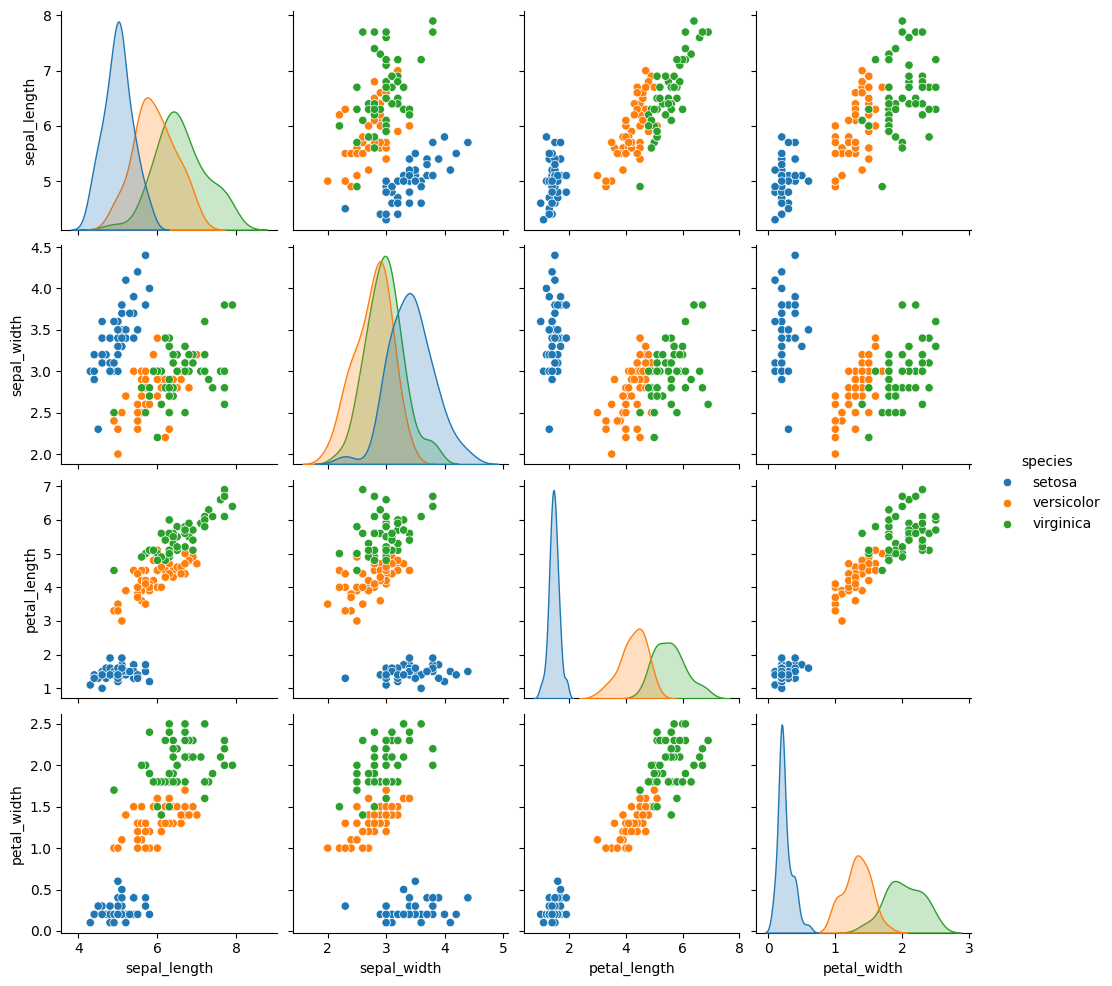

In [3]:
iris = sns.load_dataset('iris')
print(iris.head())

sns.pairplot(iris, hue='species')
plt.show()

In [ ]:
data = iris[['sepal_length', 'petal_length', 'species']]

data

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa
...,...,...,...
145,6.7,5.2,virginica
146,6.3,5.0,virginica
147,6.5,5.2,virginica
148,6.2,5.4,virginica


Рассмотрим setosa и versicolor

(100, 3)


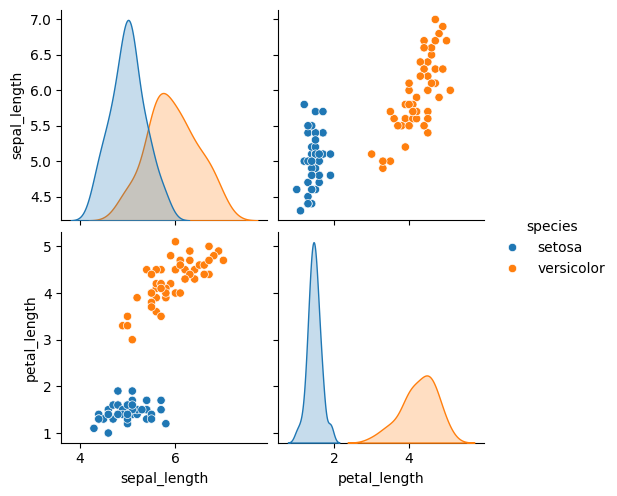

In [10]:
data_df = data[(data['species'] == 'setosa') | (data['species'] == 'versicolor')]
print(data_df.shape) # проверяем, что количество элементов уменьшилось
sns.pairplot(data_df, hue='species')

В run and debag theta_ - это матожидание; var_ - дисперсия
Делаем предположение, что нам подходит распределение Пуассона

[5.006 1.462]
[5.936 4.26 ]
[0.121764 0.029556]
[0.261104 0.2164  ]
<bound method NDFrame.head of       sepal_length  petal_length     species
0         4.300000           1.0      setosa
1         4.327273           1.0      setosa
2         4.354545           1.0      setosa
3         4.381818           1.0      setosa
4         4.409091           1.0      setosa
...            ...           ...         ...
9995      6.890909           5.1  versicolor
9996      6.918182           5.1  versicolor
9997      6.945455           5.1  versicolor
9998      6.972727           5.1  versicolor
9999      7.000000           5.1  versicolor

[10000 rows x 3 columns]>


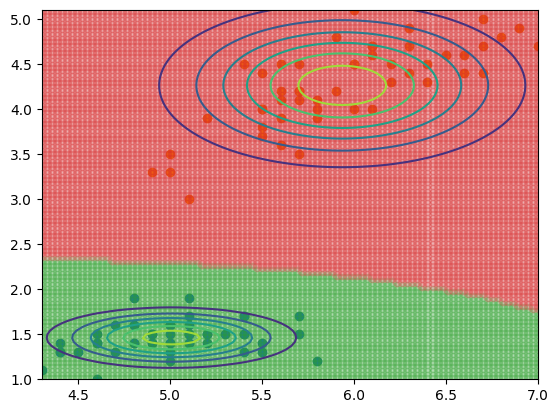

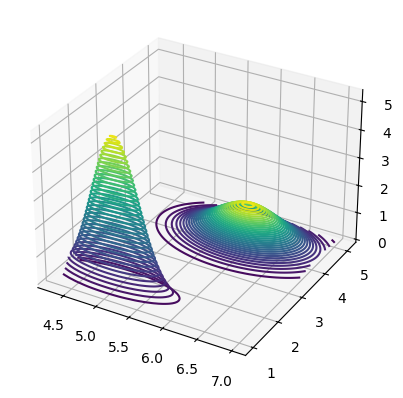

In [37]:
model = GaussianNB()
X = data_df[['sepal_length', 'petal_length']]
y = data_df['species']
model.fit(X, y) # Здесь мы уже получили все данные по нашему распределению

print(model.theta_[0])
print(model.theta_[1])
print(model.var_[0])
print(model.var_[1])

theta0 = model.theta_[0]
var0 = model.var_[0]
theta1 = model.theta_[1]
var1 = model.var_[1]

data_df_setosa = data_df[data_df['species'] == 'setosa']
data_df_versicolor = data_df[data_df['species'] == 'versicolor']

plt.scatter(data_df_setosa['sepal_length'], data_df_setosa['petal_length'])
plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

x1_p = np.linspace(min(data_df['sepal_length']), max(data_df['sepal_length']), 100)
x2_p = np.linspace(min(data_df['petal_length']), max(data_df['petal_length']), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p) # Получили пересечения

X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length']
)

z1 = 1 / (1 * np.pi * (var0[0] * var0[1]) ** 0.5) * np.exp(- 0.5 * ((X1_p - theta0[0]) ** 2 / (var0[0]) + (X2_p - theta0[1]) ** 2 / (var0[1])))
z2 = 1 / (1 * np.pi * (var1[0] * var1[1]) ** 0.5) * np.exp(- 0.5 * ((X1_p - theta1[0]) ** 2 / (var1[0]) + (X2_p - theta1[1]) ** 2 / (var1[1])))

plt.contour(X1_p, X2_p, z1)
plt.contour(X1_p, X2_p, z2)

y_p = model.predict(X_p)

X_p['species'] = y_p

# предсказания
X_p_setosa = X_p[X_p['species'] == 'setosa']
X_p_versicolor = X_p[X_p['species'] == 'versicolor']

print(X_p.head)

plt.scatter(X_p_setosa['sepal_length'], X_p_setosa['petal_length'], alpha=0.2)
plt.scatter(X_p_versicolor['sepal_length'], X_p_versicolor['petal_length'], alpha=0.2) # благодаря этому наглаядно видны зоны, в зависимости от попадания в которые данная точка будет относиться к setosa или versicolor 

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1_p, X2_p, z1, 40)
ax.contour3D(X1_p, X2_p, z2, 40)

plt.show()

Теперь сравним verginica и versicolor

(100, 3)


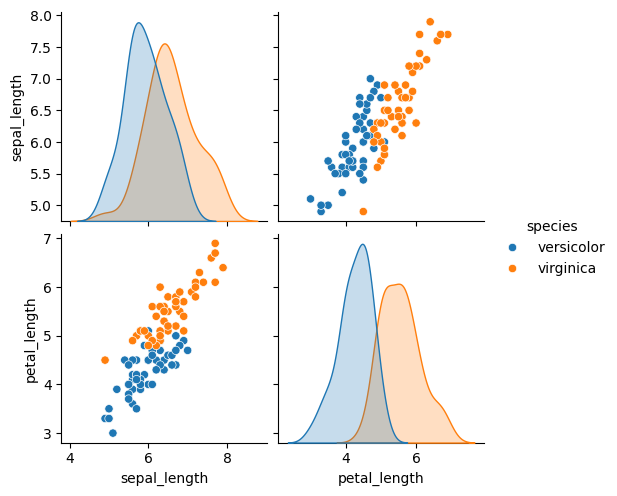

In [43]:
data_df_2 = data[(data['species'] == 'virginica') | (data['species'] == 'versicolor')]
print(data_df_2.shape) # проверяем, что количество элементов уменьшилось
sns.pairplot(data_df_2, hue='species')

[5.936 4.26 ]
[6.588 5.552]
[0.261104 0.2164  ]
[0.396256 0.298496]
<bound method NDFrame.head of       sepal_length  petal_length     species
0         4.900000           3.0  versicolor
1         4.930303           3.0  versicolor
2         4.960606           3.0  versicolor
3         4.990909           3.0  versicolor
4         5.021212           3.0  versicolor
...            ...           ...         ...
9995      7.778788           6.9   virginica
9996      7.809091           6.9   virginica
9997      7.839394           6.9   virginica
9998      7.869697           6.9   virginica
9999      7.900000           6.9   virginica

[10000 rows x 3 columns]>


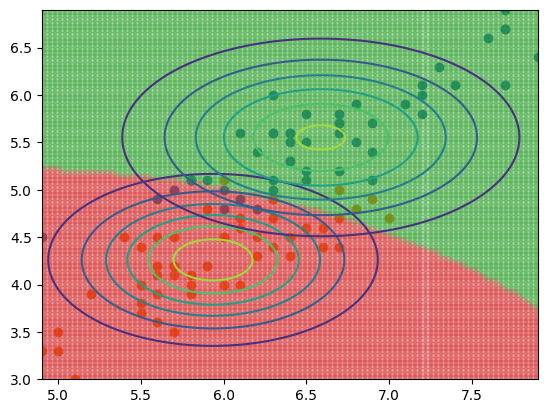

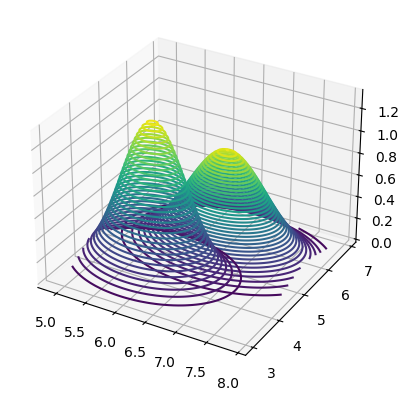

In [46]:
model = GaussianNB()
X = data_df_2[['sepal_length', 'petal_length']]
y = data_df_2['species']
model.fit(X, y) # Здесь мы уже получили все данные по нашему распределению

print(model.theta_[0])
print(model.theta_[1])
print(model.var_[0])
print(model.var_[1])

theta0 = model.theta_[0]
var0 = model.var_[0]
theta1 = model.theta_[1]
var1 = model.var_[1]

data_df_virginica = data_df_2[data_df_2['species'] == 'virginica']
data_df_versicolor = data_df_2[data_df_2['species'] == 'versicolor']

plt.scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'])
plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

x1_p = np.linspace(min(data_df_2['sepal_length']), max(data_df_2['sepal_length']), 100)
x2_p = np.linspace(min(data_df_2['petal_length']), max(data_df_2['petal_length']), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p) # Получили пересечения

X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length']
)

z1 = 1 / (1 * np.pi * (var0[0] * var0[1]) ** 0.5) * np.exp(- 0.5 * ((X1_p - theta0[0]) ** 2 / (var0[0]) + (X2_p - theta0[1]) ** 2 / (var0[1])))
z2 = 1 / (1 * np.pi * (var1[0] * var1[1]) ** 0.5) * np.exp(- 0.5 * ((X1_p - theta1[0]) ** 2 / (var1[0]) + (X2_p - theta1[1]) ** 2 / (var1[1])))

plt.contour(X1_p, X2_p, z1)
plt.contour(X1_p, X2_p, z2)

y_p = model.predict(X_p)

X_p['species'] = y_p

# предсказания
X_p_virginica = X_p[X_p['species'] == 'virginica']
X_p_versicolor = X_p[X_p['species'] == 'versicolor']

print(X_p.head)

plt.scatter(X_p_virginica['sepal_length'], X_p_virginica['petal_length'], alpha=0.2)
plt.scatter(X_p_versicolor['sepal_length'], X_p_versicolor['petal_length'], alpha=0.2) # благодаря этому наглаядно видны зоны, в зависимости от попадания в которые данная точка будет относиться к virginica или versicolor 

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1_p, X2_p, z1, 40)
ax.contour3D(X1_p, X2_p, z2, 40)

plt.show()